<a href="https://colab.research.google.com/github/FransHutagalung/TF-IDF/blob/main/TF_IDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data = [
    "Durian di kedai ini enak",
    "Durian montong enak tapi mahal",
    "Saya ga suka durian"
]
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(data)

In [ ]:
print("Feature names: ", vectorizer.get_feature_names_out())
print("TF-IDF Matrix: ")
print(tfidf.toarray())

Feature names:  ['di' 'durian' 'enak' 'ga' 'ini' 'kedai' 'mahal' 'montong' 'saya' 'suka'
 'tapi']
TF-IDF Matrix: 
[[0.50461134 0.29803159 0.38376993 0.         0.50461134 0.50461134
  0.         0.         0.         0.         0.        ]
 [0.         0.29803159 0.38376993 0.         0.         0.
  0.50461134 0.50461134 0.         0.         0.50461134]
 [0.         0.32274454 0.         0.54645401 0.         0.
  0.         0.         0.54645401 0.54645401 0.        ]]


### Kompleks


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import nltk
import re
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
corpus = [
    "Romeo adalah orang yang romantis.",
    "Yedija suka makan dada ayam yang sebelah kanan.",
    "Jesika tidak membawa kue .",
    "Jesika dan Revania adalah kawan Carolin.",
    "Adhi akan mencalonkan diri menjadi ceo IT Company and amazone.",
    "Romeo sedang menjalin hubungan dengan wanita dari daerah kabanjahe "
]

In [4]:
tokenized_docs = [doc.lower().split() for doc in corpus]

#### Preprocessing

In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    filtered_tokens = [w for w in tokens if not w in stop_words and len(w) > 2]
    return ' '.join(filtered_tokens)

clean_corpus = [clean_text(doc) for doc in corpus]

#### Vektorisasi

##### Term Frequency

In [ ]:
def compute_counts(doc):
    """Menghitung frekuensi kemunculan term dalam dokumen."""
    count_dict = {}
    for term in doc:
        count_dict[term] = count_dict.get(term, 0) + 1
    return count_dict

def compute_tf(count_dict, total_terms):
    """Menghitung TF dari frekuensi kemunculan."""
    return {term: count / total_terms for term, count in count_dict.items()}


In [8]:
def compute_counts(tokens):
    """Menghitung frekuensi setiap token dalam dokumen"""
    counts = {}
    for token in tokens:
        counts[token] = counts.get(token, 0) + 1
    return counts

def compute_tf(count_dict, doc_length):
    """Menghitung Term Frequency (TF) untuk setiap token"""
    tf_dict = {}
    for term, count in count_dict.items():
        tf_dict[term] = count / doc_length
    return tf_dict

In [9]:
count_list = [compute_counts(doc) for doc in tokenized_docs]
tf_list = [compute_tf(count, len(doc)) for count, doc in zip(count_list, tokenized_docs)]

# Mengumpulkan semua term unik dari semua dokumen
all_terms = set()
for counts in count_list:
    all_terms.update(counts.keys())
all_terms = sorted(all_terms)

# Membuat DataFrame untuk menampilkan hasil
rows = []
for term in all_terms:
    row = {'Term': term}
    for i in range(len(count_list)):
        row[f'R{i+1}'] = count_list[i].get(term, 0)
        row[f'TF (R{i+1})'] = round(tf_list[i].get(term, 0.0), 3)
    rows.append(row)
df = pd.DataFrame(rows).set_index('Term')

# Menampilkan tabel
print("Tabel Frekuensi dan TF:")
print(df.to_markdown(numalign="left", stralign="left"))

Tabel Frekuensi dan TF:
| Term        | R1   | TF (R1)   | R2   | TF (R2)   | R3   | TF (R3)   | R4   | TF (R4)   | R5   | TF (R5)   | R6   | TF (R6)   |
|:------------|:-----|:----------|:-----|:----------|:-----|:----------|:-----|:----------|:-----|:----------|:-----|:----------|
| .           | 0    | 0         | 0    | 0         | 1    | 0.2       | 0    | 0         | 0    | 0         | 0    | 0         |
| adalah      | 1    | 0.2       | 0    | 0         | 0    | 0         | 1    | 0.167     | 0    | 0         | 0    | 0         |
| adhi        | 0    | 0         | 0    | 0         | 0    | 0         | 0    | 0         | 1    | 0.1       | 0    | 0         |
| akan        | 0    | 0         | 0    | 0         | 0    | 0         | 0    | 0         | 1    | 0.1       | 0    | 0         |
| amazone.    | 0    | 0         | 0    | 0         | 0    | 0         | 0    | 0         | 1    | 0.1       | 0    | 0         |
| and         | 0    | 0         | 0    | 0         | 0    | 0    

Visualisasi

<ipython-input-10-127bf0ca32f0>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-10-127bf0ca32f0>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


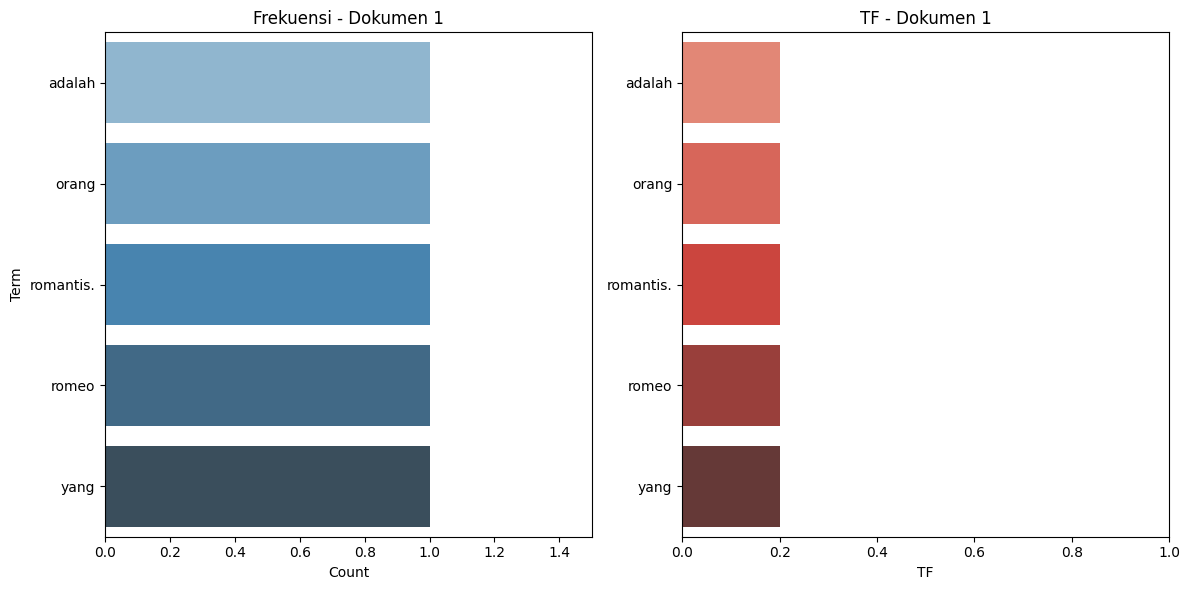

<ipython-input-10-127bf0ca32f0>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-10-127bf0ca32f0>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


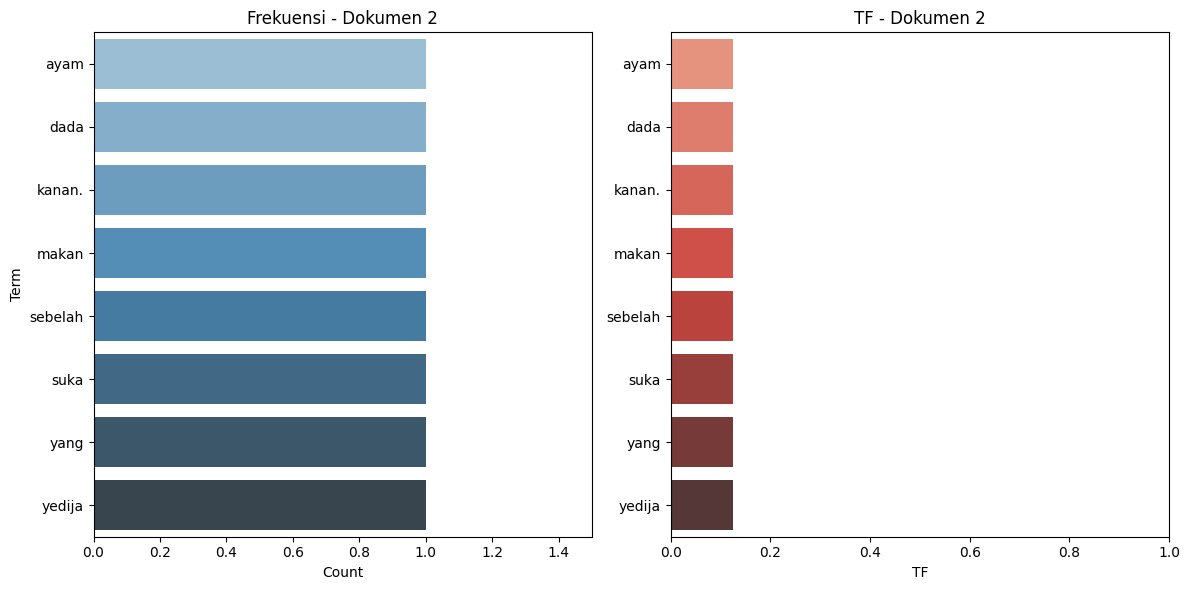

<ipython-input-10-127bf0ca32f0>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-10-127bf0ca32f0>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


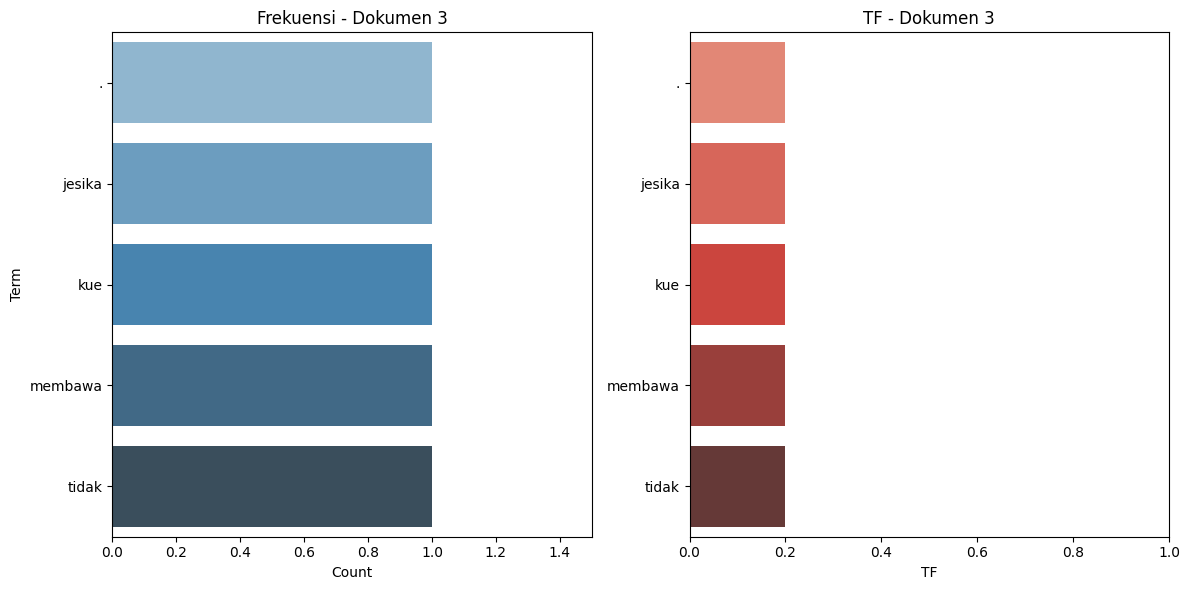

<ipython-input-10-127bf0ca32f0>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-10-127bf0ca32f0>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


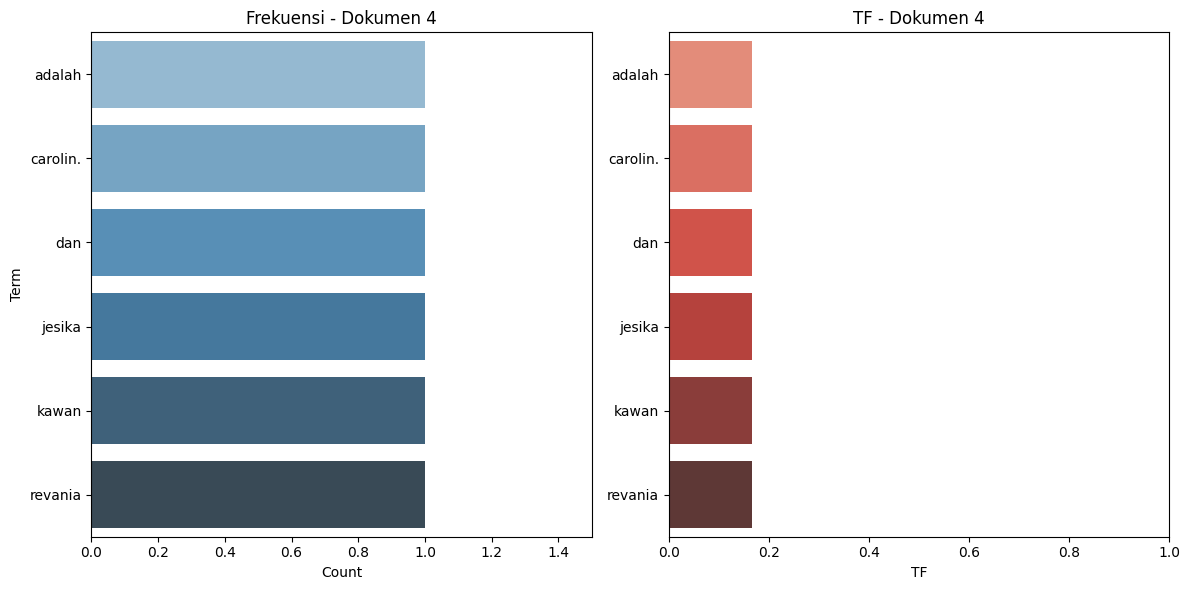

<ipython-input-10-127bf0ca32f0>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-10-127bf0ca32f0>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


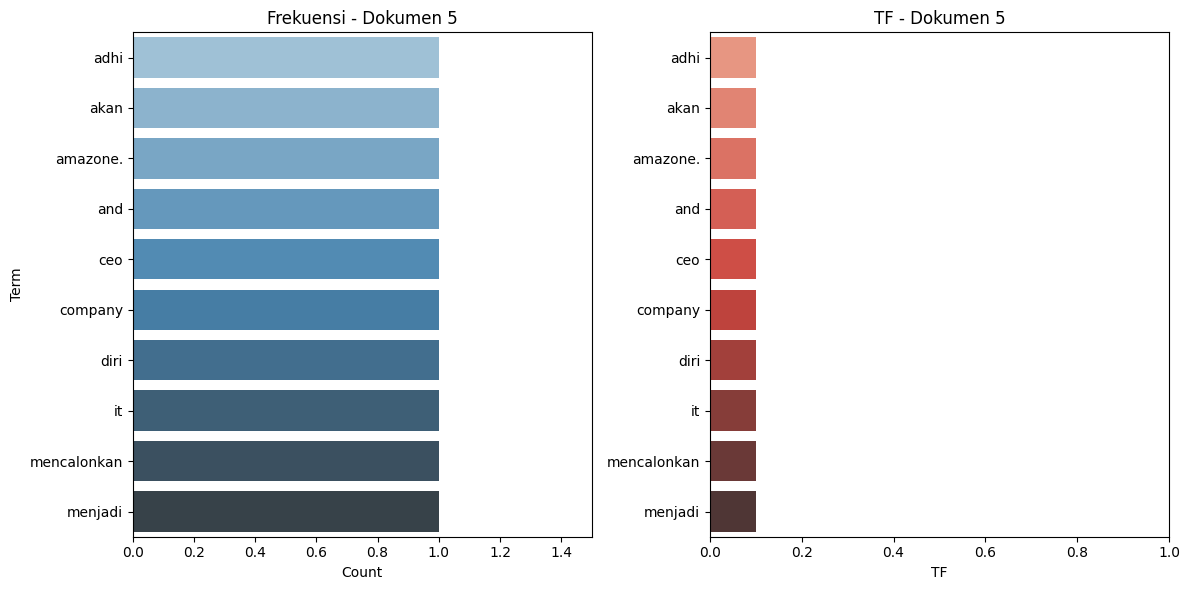

<ipython-input-10-127bf0ca32f0>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-10-127bf0ca32f0>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


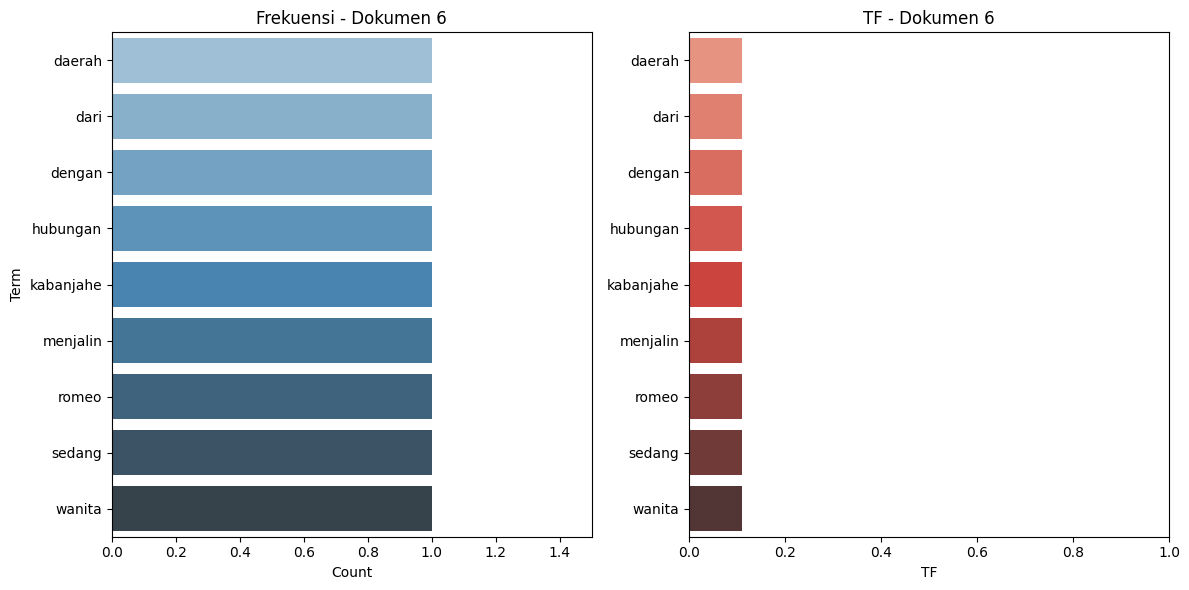

In [10]:
for i, (count_doc, tf_doc) in enumerate(zip(count_list, tf_list)):
    if not count_doc:  # Skip jika dokumen kosong
        continue

    # Memastikan bahwa terms diurutkan berdasarkan nilai count
    terms = sorted(count_doc.keys())
    counts = [count_doc[term] for term in terms]
    tfs = [tf_doc[term] for term in terms]

    # Buat DataFrame untuk memudahkan visualisasi
    df_viz = pd.DataFrame({
        'Term': terms,
        'Count': counts,
        'TF': tfs
    })

    # Urutkan berdasarkan count (descending) dan term (ascending untuk kesamaan)
    df_viz = df_viz.sort_values(by=['Count', 'Term'], ascending=[False, True])

    plt.figure(figsize=(12, 6))

    # Plot Frekuensi Kemunculan (Count)
    plt.subplot(1, 2, 1)
    sns.barplot(
        x='Count',
        y='Term',
        data=df_viz,
        palette="Blues_d"
    )
    plt.title(f"Frekuensi - Dokumen {i+1}")
    plt.xlabel("Count")
    plt.ylabel("Term")
    plt.xlim(0, max(counts) + 0.5)  # Memberikan sedikit ruang tambahan

    # Plot TF
    plt.subplot(1, 2, 2)
    sns.barplot(
        x='TF',
        y='Term',
        data=df_viz,
        palette="Reds_d"
    )
    plt.title(f"TF - Dokumen {i+1}")
    plt.xlabel("TF")
    plt.ylabel("")
    plt.xlim(0, 1.0)  # Batas TF 0-1

    plt.tight_layout()
    plt.show()

In [ ]:
def compute_idf(tokenized_docs):
    """Menghitung IDF untuk setiap term dalam koleksi dokumen."""
    N = len(tokenized_docs)  # Total dokumen
    idf_dict = {}

    # Kumpulkan semua term unik
    all_terms = set()
    for doc in tokenized_docs:
        all_terms.update(doc) # menambahkan item
    all_terms = sorted(all_terms) # menyorting

    # Hitung DF (Document Frequency) untuk setiap term
    df_dict = {}
    for term in all_terms:
        df = 0
        for doc in tokenized_docs:
            if term in doc:
                df += 1
        df_dict[term] = df

    # Hitung IDF: log(N / (df + 1)) untuk menghindari division by zero
    idf_dict = {term: np.log(N / (df + 1)) for term, df in df_dict.items()}

    return idf_dict

Tabel IDF:
| Term        | IDF      |
|:------------|:---------|
| .           | 1.09861  |
| adhi        | 1.09861  |
| akan        | 1.09861  |
| and         | 1.09861  |
| amazone.    | 1.09861  |
| ayam        | 1.09861  |
| carolin.    | 1.09861  |
| sebelah     | 1.09861  |
| ceo         | 1.09861  |
| company     | 1.09861  |
| dada        | 1.09861  |
| daerah      | 1.09861  |
| dan         | 1.09861  |
| dari        | 1.09861  |
| dengan      | 1.09861  |
| diri        | 1.09861  |
| hubungan    | 1.09861  |
| it          | 1.09861  |
| kabanjahe   | 1.09861  |
| kawan       | 1.09861  |
| kanan.      | 1.09861  |
| kue         | 1.09861  |
| makan       | 1.09861  |
| yedija      | 1.09861  |
| membawa     | 1.09861  |
| mencalonkan | 1.09861  |
| menjadi     | 1.09861  |
| menjalin    | 1.09861  |
| orang       | 1.09861  |
| revania     | 1.09861  |
| romantis.   | 1.09861  |
| wanita      | 1.09861  |
| sedang      | 1.09861  |
| suka        | 1.09861  |
| tidak       | 1

<ipython-input-38-5ecd72351299>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=terms, palette="viridis")


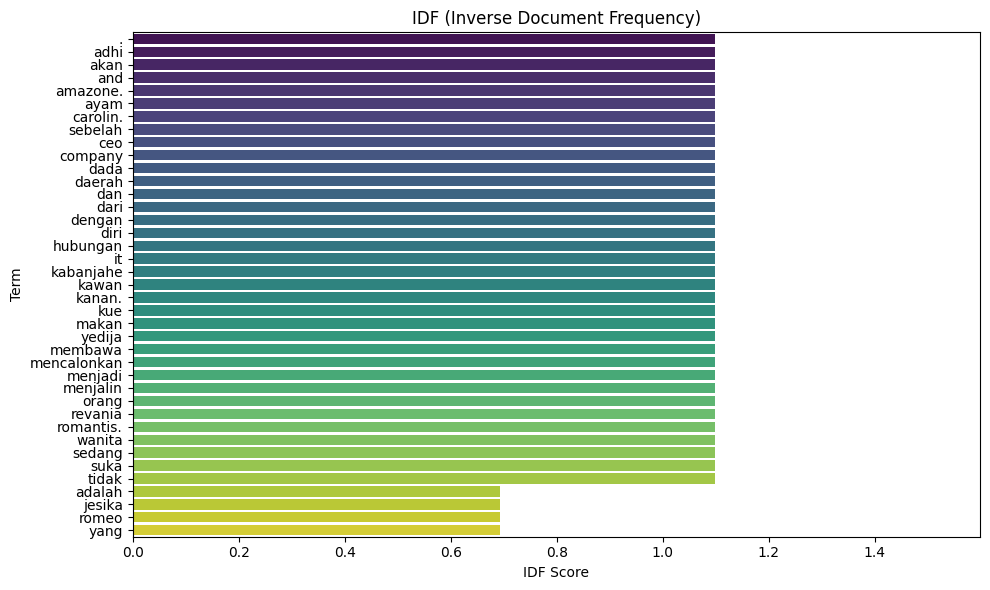

In [ ]:
idf_scores = compute_idf(tokenized_docs)

# Konversi ke DataFrame untuk tabel
df_idf = pd.DataFrame({
    'Term': list(idf_scores.keys()),
    'IDF': list(idf_scores.values())
}).sort_values(by='IDF', ascending=False).reset_index(drop=True)

# Tampilkan Tabel IDF
print("Tabel IDF:")
print(df_idf.to_markdown(index=False, numalign="left", stralign="left"))

# Tampilkan Grafik IDF
plt.figure(figsize=(10, 6))
terms = df_idf['Term']
scores = df_idf['IDF']

sns.barplot(x=scores, y=terms, palette="viridis")
plt.title("IDF (Inverse Document Frequency)")
plt.xlabel("IDF Score")
plt.ylabel("Term")
plt.xlim(0, max(scores) + 0.5)  # Sesuaikan batas sumbu x
plt.tight_layout()
plt.show()

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_corpus)
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Matrix:")
print(tfidf_df.round(2))


TF-IDF Matrix:
   adalah  adhi  akan  amazone  ayam  carolin   ceo  company  dada  daerah  \
0    0.41  0.00  0.00     0.00  0.00     0.00  0.00     0.00  0.00    0.00   
1    0.00  0.00  0.00     0.00  0.36     0.00  0.00     0.00  0.36    0.00   
2    0.00  0.00  0.00     0.00  0.00     0.00  0.00     0.00  0.00    0.00   
3    0.35  0.00  0.00     0.00  0.00     0.43  0.00     0.00  0.00    0.00   
4    0.00  0.35  0.35     0.35  0.00     0.00  0.35     0.35  0.00    0.00   
5    0.00  0.00  0.00     0.00  0.00     0.00  0.00     0.00  0.00    0.34   

   ...  revania  romantis  romeo  sebelah  sedang  suka  tidak  wanita  yang  \
0  ...     0.00       0.5   0.41     0.00    0.00  0.00   0.00    0.00  0.41   
1  ...     0.00       0.0   0.00     0.36    0.00  0.36   0.00    0.00  0.30   
2  ...     0.00       0.0   0.00     0.00    0.00  0.00   0.52    0.00  0.00   
3  ...     0.43       0.0   0.00     0.00    0.00  0.00   0.00    0.00  0.00   
4  ...     0.00       0.0   0.00     

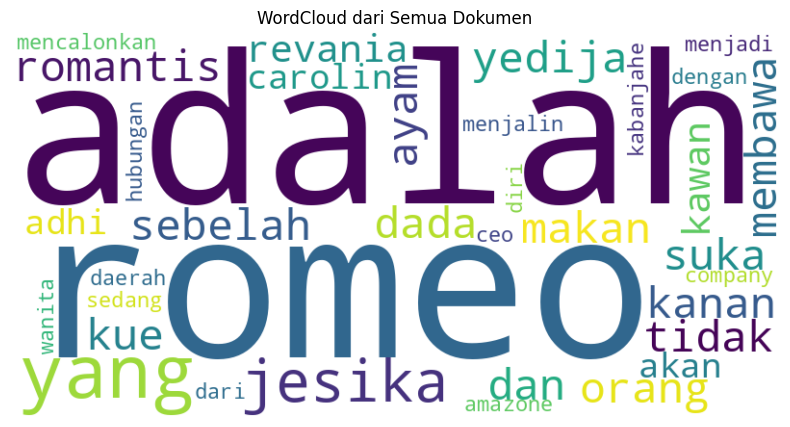

In [ ]:
text_all = " ".join(clean_corpus)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud dari Semua Dokumen")
plt.show()

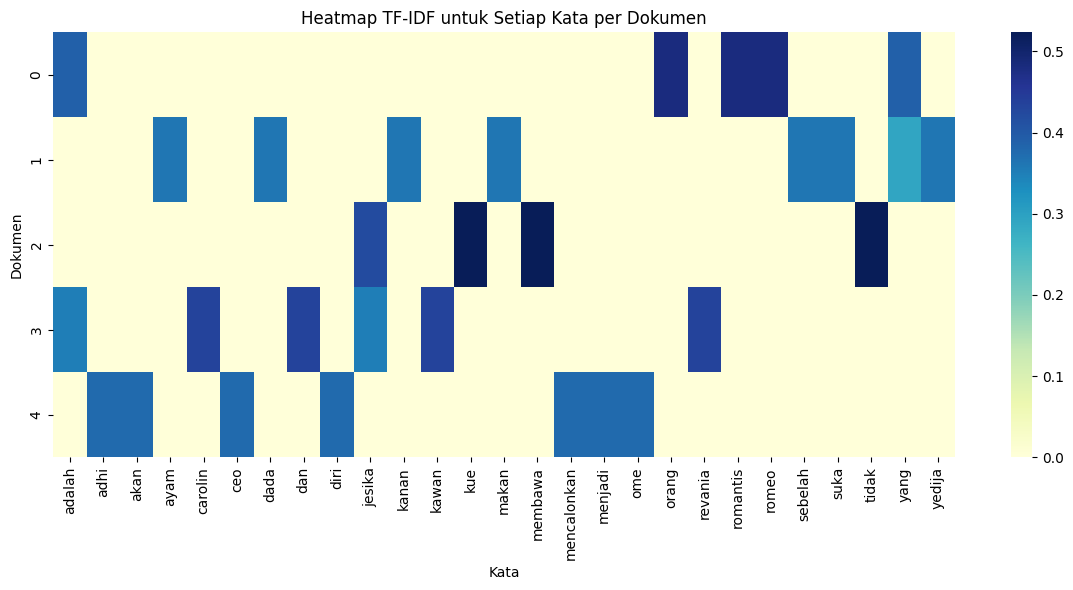

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(tfidf_df, cmap="YlGnBu", annot=False)
plt.title("Heatmap TF-IDF untuk Setiap Kata per Dokumen")
plt.xlabel("Kata")
plt.ylabel("Dokumen")
plt.tight_layout()
plt.show()

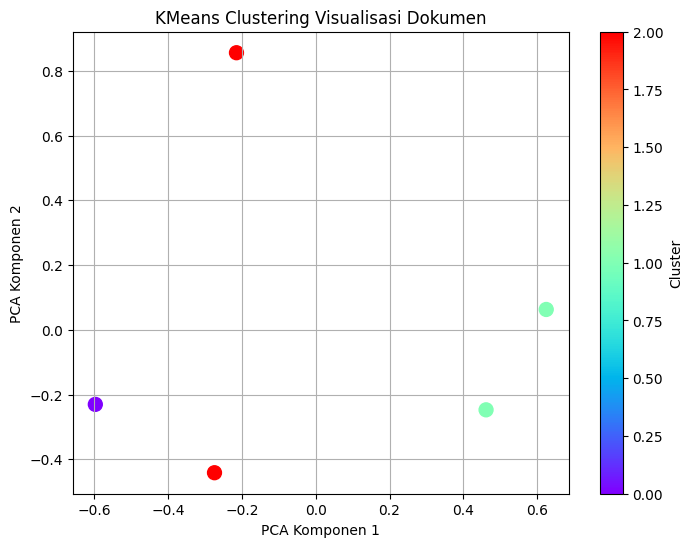

In [ ]:
k = 3
model = KMeans(n_clusters=k, random_state=42)
model.fit(X)
labels = model.labels_

pca = PCA(n_components=2)
coords = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
scatter = plt.scatter(coords[:, 0], coords[:, 1], c=labels, cmap='rainbow', s=100)
plt.title("KMeans Clustering Visualisasi Dokumen")
plt.xlabel("PCA Komponen 1")
plt.ylabel("PCA Komponen 2")
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.show()

<ipython-input-21-d2117a7c0e30>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')


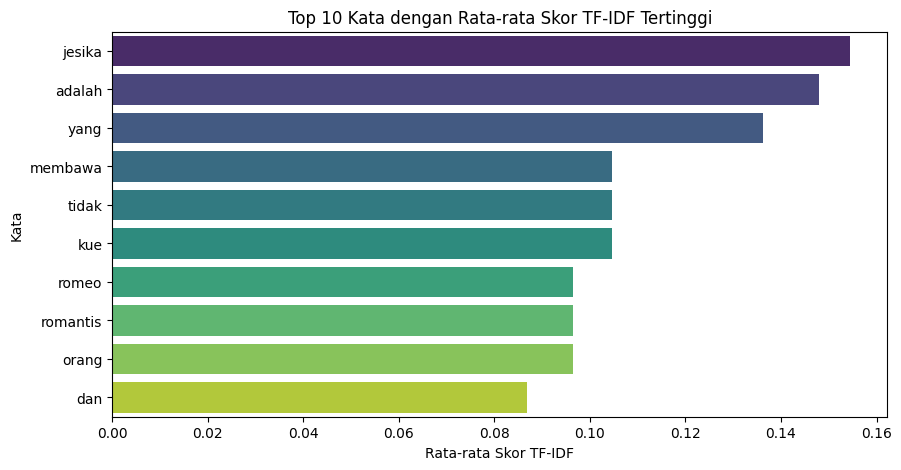

In [ ]:
top_words = tfidf_df.mean(axis=0).sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
plt.title("Top 10 Kata dengan Rata-rata Skor TF-IDF Tertinggi")
plt.xlabel("Rata-rata Skor TF-IDF")
plt.ylabel("Kata")
plt.show()